In [3]:
import cv2
import numpy as np

# AUTO BALANCE

In [4]:
img = cv2.imread('img_correct_02.jpg')

In [5]:
b, g, r = cv2.split(img)

In [12]:
b_correxted = cv2.equalizeHist(b)
g_correxted = cv2.equalizeHist(g)
r_correxted = cv2.equalizeHist(r)

In [14]:
img_corrected = cv2.merge((b_correxted, g_correxted, r_correxted))

In [15]:
cv2.imshow('original image', img)
cv2.imshow('image with color balance', img_corrected)
cv2.waitKey(0)

-1

# IMAGE GAMA

In [16]:
img = cv2.imread('img_correct_01.jpg')

In [17]:
gamma = 0.5

In [18]:
inv_gamma = 1.0 / gamma
table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')

In [19]:
img_corrected = cv2.LUT(img, table)

In [20]:
cv2.imshow('original image', img)
cv2.imshow('corrected image', img_corrected)
cv2.waitKey(0)

-1

___

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def readImagesAndTimes():
    times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
    images = []
    filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
    return images, times

In [23]:
print("Читання зображень ... ")
images, times = readImagesAndTimes()

# Вирівнюємо вхідні зображення
print("Вирівнюємо зображення ... ")
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Отримуємо функцію відповіді камери (CRF)
print("Обчислюємо функцію відповіді камери (CRF) ... ")
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Об'єднуємо зображення в лінійне зображення HDR
print("Об'єднуємо зображення в лінійне зображення HDR ... ")
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
# Save HDR image.
cv2.imwrite("hdrDebevec.hdr", hdrDebevec)
print("Зберігаємо у hdrDebevec.hdr ")

Читання зображень ... 
Вирівнюємо зображення ... 
Обчислюємо функцію відповіді камери (CRF) ... 
Об'єднуємо зображення в лінійне зображення HDR ... 
Зберігаємо у hdrDebevec.hdr 


Тонуємо з використанням методу Drago ... 
Зберігаємо у ldr-Drago.jpg


<function matplotlib.pyplot.show(close=None, block=None)>

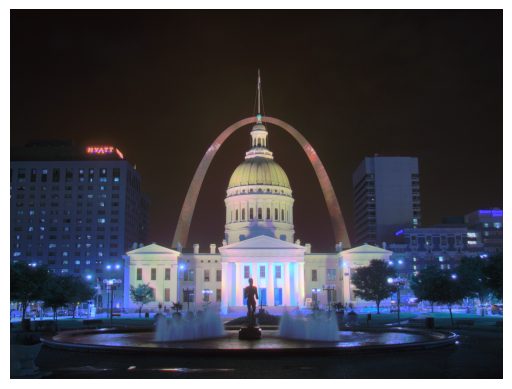

In [24]:
# Тонуємо з використанням методу Drago для отримання 24-бітного кольорового зображення
print("Тонуємо з використанням методу Drago ... ")
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
print("Зберігаємо у ldr-Drago.jpg")
hdr1 = cv2.imread("ldr-Drago.jpg")
plt.axis('off')
plt.imshow(hdr1)
plt.show

Тонуємо з використанням методу Reinhard ... 
Зберігаємо у ldr-Reinhard.jpg


<function matplotlib.pyplot.show(close=None, block=None)>

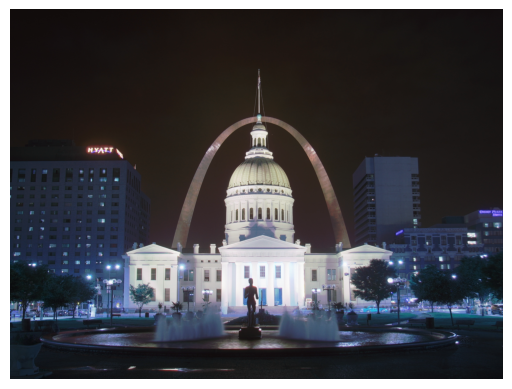

In [25]:
# Тонуємо з використанням методу Reinhard для отримання 24-бітного кольорового зображення
print("Тонуємо з використанням методу Reinhard ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)
print("Зберігаємо у ldr-Reinhard.jpg")
hdr2 = cv2.imread("ldr-Reinhard.jpg")
plt.axis('off')
plt.imshow(hdr2)
plt.show

Тонуємо з використанням методу Mantiuk ... 
Зберігаємо у ldr-Mantiuk.jpg


<function matplotlib.pyplot.show(close=None, block=None)>

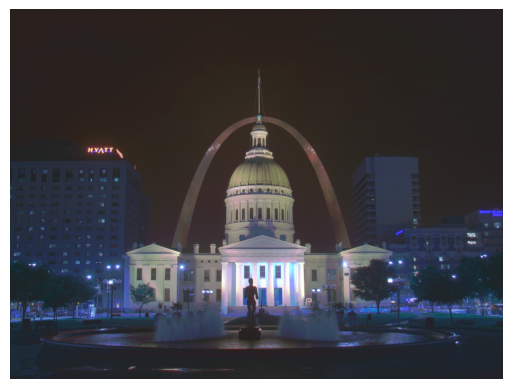

In [26]:
# Тонуємо з використанням методу Mantiuk для отримання 24-бітного кольорового зображення
print("Тонуємо з використанням методу Mantiuk ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
print("Зберігаємо у ldr-Mantiuk.jpg")
hdr3 = cv2.imread("ldr-Mantiuk.jpg")
plt.axis('off')
plt.imshow(hdr3)
plt.show

# RESIZE IMAGE

In [27]:
image = cv2.imread("img_correct_04.jpg")

In [28]:
image_resize = cv2.resize(image, (1408, 1056), interpolation = cv2.INTER_AREA)

In [29]:
cv2.imwrite("resize_image.jpg", image_resize)

True

# IMAGE COMPRESSION

In [30]:
import os

In [31]:
image = cv2.imread("img_correct_04.jpg")

In [32]:
cv2.imwrite("compressed_image.jpg", image, [cv2.IMWRITE_JPEG_QUALITY, 80])

print("Image Compressed Successfully")

Image Compressed Successfully
